# Übungen

## Aufgabe 1: Gleitpunktarithmetik

Welches Ergebnis erhalten Sie für die Rechnung 
    
$2590 + 4 + 4 + 4$

in Gleitpunktarithmetik zur Basis $\beta=10$ mit Mantissenlänge $t=3$, wenn sie die Summanden
    
(a) von links nach rechts und \
(b) von rechts nach links
    
abarbeiten? Welche allgemeine Konsequenz lässt sich daraus ableiten?

## Aufgabe 2: Auslöschung 
Berechnen Sie mit dem Taschenrechner
 
 $f(x)=\ln(\sqrt{x^2+1}-x)$
 
 für $x=10^4$ und $x=10^6$. Welches Ergebnis ist richtig?
 Wie können Sie das Ergebnis umformen, um ein richtiges Ergebnis zu erhalten?
 
 (Hinweis: Vermeiden Sie die Subtraktion von etwa gleich großen Zahlen)

## Aufgabe 3: Overflow

Die Beträge von $x$ und $y$ in der Formel

 $r=\sqrt{x^2 + y^2}$
 
 seien so groß, dass die Auswertung von $x^2+y^2$ zu einem Overflow führt, obwohl $r$ im zulässigen Bereich der Maschinenzahlen liegt.
 Formen Sie die Formel so um, dass ein Overflow vermieden wird.
 

## Aufgabe 4: Rundungsfehler

MATLAB bzw. Octave steht für die Auflösung reeller Zahlen die Menge der sogenannten Maschinenzahlen zur Verfügung. Diese haben eine endliche Genauigkeit, welche Sie sich mit dem Befehl

In [1]:
eps

ans =    2.2204e-16


ausgeben lassen können. Bei der Eingabe einer reellen Zahl wird intern eine Maschinenzahl verwendet, die nicht zwangsweise mit dem tatsächlich eingegebenen Wert übereinstimmt. Es entsteht also ein (kleiner) Rundungsfehler im Rahmen der Maschinengenauigkeit.

François Viète hat 1593 als erster eine analytische Gleichung für die Kreiszahl $\pi$ veröffentlicht. Zu diesem Zeitpunkt gab es zwar bereits einige Ansätze $\pi$ zu approximieren, doch seine Darstellung als unendliches Produkt

$$
\begin{align}
a_1 &= \frac{1}{2}\sqrt{2}, \\
a_n &= \frac{1}{2}\sqrt{2+2a_{n-1}}, \text{ für } n \geq 2 
\end{align}
$$

$$ \Rightarrow \frac{2}{\pi} = \lim_{n \to \infty} a_i = a_1 \cdot a_2 \cdot a_3 \cdot ... = \left( \frac{1}{2}\sqrt{2} \right) \cdot \left( \frac{1}{2}\sqrt{2+\sqrt{2}} \right) \cdot \left( \frac{1}{2}\sqrt{2+\sqrt{2 + \sqrt{2}}} \right) \cdot ... $$

war neu. Die Produktformel lässt sich äquivalent als eine Folge schreiben:

$$ 
\begin{align}
z_0 &= 2, \notag \\
z_n &= 2^{n+\frac{1}{2}}\sqrt{1-\sqrt{1-4^{-n}z_{n-1}^2}}, \text{ für } n = 1, 2, 3, ... 
\end{align}
$$

Die Folge konvergiert für $n \to \infty$ gegen $\pi$:

$$ \lim_{n \to \infty} z_n = \pi. $$

Herr Viète konnte damals noch nichts von Computern und den inherent eingebauten Rundungsfehlern wissen. Leider ist gerade seine Folge anfällig für Fehlerfortplanzung, d.h. kleine Rundungsfehler in jedem Iterationsschritt verstärken sich. Schreiben Sie ein kleines Matlabskript, das diese Fehlerfortplanzung demonstriert. Berechnen Sie dazu für $n=1,2,3,...,20$ jeweils die Folgeglieder $z_n$. Berechnen Sie für jedes $z_n$ den relativen Fehler

$$ r_n = \frac{|\pi - z_n|}{\pi}. $$

Erstellen Sie einen Plot, in dem der Logarithmus des relativen Fehlers in Abhängigkeit der Iterationszahl $n$ dargestellt ist. Wie verhält sich der Fehler für kleine bzw. große $n$?

In [ ]:
% demonstrate numerical error propagation using Viète's formula for approximating pi

# Aufgabe 5: Rechengenauigkeit

Wird einer Variablen x ein Wert zugewiesen, speichtert MATLAB bzw. Octave diesen Wert. Dabei wird zwischen unterschiedlichen Datentypen unterschieden. Mit dem Befehl 'whos' können Informationen wie der Datentyp oder Speicherbedarf eingesehen werden. 

In [13]:
clear;
x = single(1);
y = 'Hallo';
z = 5.9*10^59;
i = int64(928837182);

error: 'int' undefined near line 1 column 5


In [11]:
whos

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        i           1x1                          8  int64
        x           1x1                          4  single
        y           1x5                          5  char
        z           1x1                          8  double

Total is 8 elements using 25 bytes



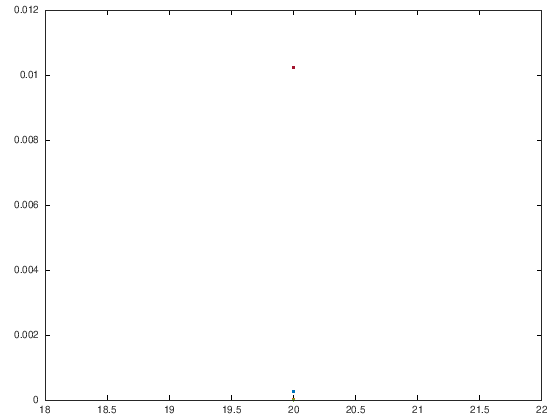

In [105]:
clear;
x = pi/3;
s1 = sin(x);

n = 9;


for j = 1:20
    y = zeros(1,j+1);
    ys = zeros(1,j+1);
    for i = 0:j
       y(i+1) =y(i+1) + (-1)^i*x^(2*i+1)/factorial(2*i+1); 
       ys(i+1) = single(ys(i+1) + (-1)^i*x^(2*i+1)/factorial(2*i+1));
    end

    s2 = sum(y);
    s2s = sum(ys);
    delta_d(j) = abs(s1-s2);
    delta_s(j) = abs(s1-s2s);
end

figure(1);
plot(j, [delta_d delta_s])

In [104]:
whos delta_d

Variables in the current scope:

   Attr Name         Size                     Bytes  Class
   ==== ====         ====                     =====  ===== 
        delta_d      1x20                       160  double

Total is 20 elements using 160 bytes

